# ML1 HW3 Parkinson's Dataset - Trials with lower alpha
Submitted by: LT3 | Agapito, Banquerigo, Bautista, Delfin, Estrada, Ymson

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plot

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer
pd.options.display.float_format = '{:,.2g}'.format
warnings.filterwarnings("ignore") 

In [2]:
df_park = pd.read_excel('parkinsons_updrs.xlsx', sheet_name="parkinsons_updrs")
display(df_park)

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Target
0,1,72,0,5.6,28,0.0066,3.4e-05,0.004,0.0032,0.012,...,0.014,0.013,0.017,0.043,0.014,22,0.42,0.55,0.16,34
1,1,72,0,13,28,0.003,1.7e-05,0.0013,0.0015,0.004,...,0.0099,0.011,0.017,0.03,0.011,27,0.43,0.56,0.11,35
2,1,72,0,20,29,0.0048,2.5e-05,0.0021,0.0021,0.0062,...,0.0073,0.0084,0.015,0.022,0.02,23,0.46,0.54,0.21,35
3,1,72,0,26,29,0.0053,2.7e-05,0.0019,0.0026,0.0057,...,0.011,0.013,0.02,0.033,0.028,24,0.49,0.58,0.33,36
4,1,72,0,34,29,0.0034,2e-05,0.00093,0.0013,0.0028,...,0.0068,0.0093,0.018,0.02,0.012,26,0.47,0.56,0.19,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,1.4e+02,22,0.0041,3.1e-05,0.0017,0.0017,0.005,...,0.0097,0.011,0.015,0.029,0.025,22,0.64,0.55,0.21,33
5871,42,61,0,1.5e+02,22,0.003,2.5e-05,0.0012,0.0015,0.0036,...,0.011,0.013,0.019,0.032,0.012,23,0.53,0.57,0.13,33
5872,42,61,0,1.6e+02,21,0.0035,2.5e-05,0.0015,0.0019,0.0046,...,0.014,0.015,0.019,0.041,0.018,25,0.48,0.58,0.14,32
5873,42,61,0,1.6e+02,21,0.0028,2e-05,0.0013,0.0015,0.0038,...,0.0069,0.0087,0.013,0.021,0.008,24,0.57,0.56,0.14,32


In [3]:
df_X = df_park.drop('Target', axis=1)
df_y = df_park.Target.to_frame()
display(df_X)
display(df_y)

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6,28,0.0066,3.4e-05,0.004,0.0032,0.012,...,0.23,0.014,0.013,0.017,0.043,0.014,22,0.42,0.55,0.16
1,1,72,0,13,28,0.003,1.7e-05,0.0013,0.0015,0.004,...,0.18,0.0099,0.011,0.017,0.03,0.011,27,0.43,0.56,0.11
2,1,72,0,20,29,0.0048,2.5e-05,0.0021,0.0021,0.0062,...,0.18,0.0073,0.0084,0.015,0.022,0.02,23,0.46,0.54,0.21
3,1,72,0,26,29,0.0053,2.7e-05,0.0019,0.0026,0.0057,...,0.33,0.011,0.013,0.02,0.033,0.028,24,0.49,0.58,0.33
4,1,72,0,34,29,0.0034,2e-05,0.00093,0.0013,0.0028,...,0.18,0.0068,0.0093,0.018,0.02,0.012,26,0.47,0.56,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,1.4e+02,22,0.0041,3.1e-05,0.0017,0.0017,0.005,...,0.16,0.0097,0.011,0.015,0.029,0.025,22,0.64,0.55,0.21
5871,42,61,0,1.5e+02,22,0.003,2.5e-05,0.0012,0.0015,0.0036,...,0.21,0.011,0.013,0.019,0.032,0.012,23,0.53,0.57,0.13
5872,42,61,0,1.6e+02,21,0.0035,2.5e-05,0.0015,0.0019,0.0046,...,0.24,0.014,0.015,0.019,0.041,0.018,25,0.48,0.58,0.14
5873,42,61,0,1.6e+02,21,0.0028,2e-05,0.0013,0.0015,0.0038,...,0.13,0.0069,0.0087,0.013,0.021,0.008,24,0.57,0.56,0.14


,Target
0,34
1,35
2,35
3,36
4,36
...,...
5870,33
5871,33
5872,32
5873,32


# Ridge Regression

In [4]:
training_df = pd.DataFrame()
test_df = pd.DataFrame()
alpha_list =  [1e-20, 1e-18, 1e-15, 1e-12, 1e-10, 1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10]
trials = 30
for seedN in range(1, trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                        test_size=.25, 
                                                        random_state=seedN)
    
    traning_accuracy = []
    test_accuracy = []
    
    for alpha in alpha_list:
        ridge = Ridge(alpha=alpha).fit(X_train, y_train)
        traning_accuracy.append(ridge.score(X_train, y_train))
        test_accuracy.append(ridge.score(X_test, y_test))
        
    training_df[seedN] = traning_accuracy
    test_df[seedN] = test_accuracy
    

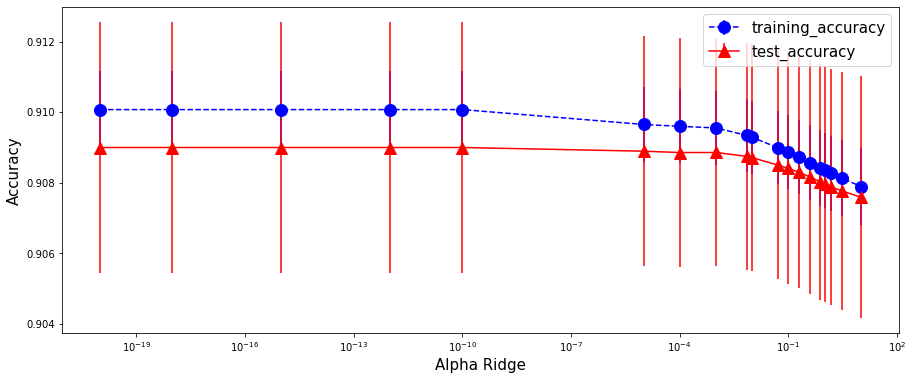

In [5]:
fig = plt.figure(figsize=(15, 6))
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_list, training_df.mean(axis=1), 
             yerr=training_df.std(axis=1),
             label='training_accuracy', color='blue', marker='o', 
             linestyle='dashed', markersize=12)

plt.errorbar(alpha_list, test_df.mean(axis=1), 
             yerr=test_df.std(axis=1),
             label='test_accuracy', color='red', marker='^', 
             linestyle='-', markersize=12)

plt.xlabel('Alpha Ridge', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()


In [6]:
optim_index = np.argmax(test_df.mean(axis=1))
optim_alpha = alpha_list[optim_index]
#best_seed = np.argmax(test_df.T[optim_index]) + 1
print(f'Highest Average Train: {np.max(training_df.mean(axis=1))}')
print(f'Highest Average Test: {np.max(test_df.mean(axis=1))}')
print(f'Optimal Alpha: {optim_alpha}')
print(f'Highest Test: {np.max(test_df.T[optim_index])}')


Highest Average Train: 0.9100718304999189
Highest Average Test: 0.9089973485011558
Optimal Alpha: 1e-10
Highest Test: 0.9142600994024017


training set score: 0.909447
test set score: 0.910434
number of features used: 21
Weight of the top predictor = 18770.731402
Top Predictor is Column 6
number of features used: 21


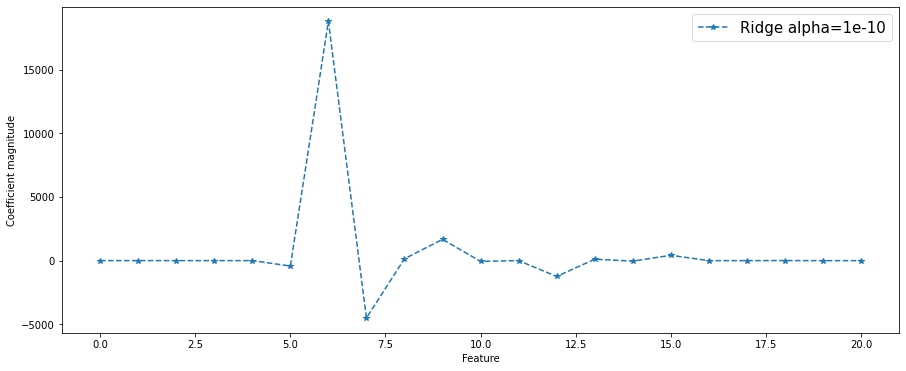

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25)
ridge = Ridge(alpha=optim_alpha, max_iter=10000).fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))
print("number of features used: %d" % np.sum(ridge.coef_ != 0))


print("Weight of the top predictor = %f" %np.abs(np.amax(ridge.coef_.T)))
print("Top Predictor is Column %s" %np.abs(np.argmax(ridge.coef_.T)))
print("number of features used: %d" % np.sum(ridge.coef_ != 0))

fig = plt.figure(figsize=(15, 6))

plt.plot(ridge.coef_.T, '--*', label=f"Ridge alpha={optim_alpha}")
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

(-1.0, 21.0)

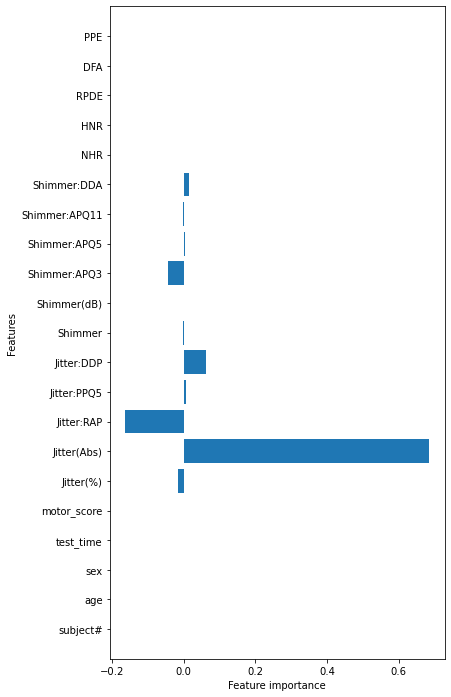

In [8]:
weights_normalized= ridge.coef_.T/np.sum(np.abs(ridge.coef_.T))


fig = plt.figure(figsize=(6, 12))
n_features = len(df_X.columns)
plt.barh(range(n_features), weights_normalized.flatten(), align='center')
plt.yticks(range(n_features), df_X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1,n_features)

# Lasso Regression

In [9]:
training_df = pd.DataFrame()
test_df = pd.DataFrame()
alpha_list =  [1e-20, 1e-18, 1e-15, 1e-12, 1e-10, 1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10]

trials = 30
for seedN in range(1, trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                        test_size=.25, 
                                                        random_state=seedN)
    
    traning_accuracy = []
    test_accuracy = []
    
    for alpha in alpha_list:
        ridge = Lasso(alpha=alpha).fit(X_train, y_train)
        traning_accuracy.append(ridge.score(X_train, y_train))
        test_accuracy.append(ridge.score(X_test, y_test))
        
    training_df[seedN] = traning_accuracy
    test_df[seedN] = test_accuracy
    

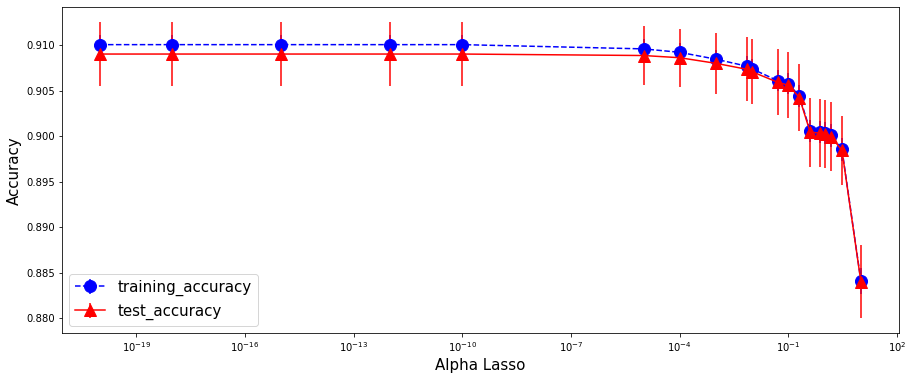

In [10]:
fig = plt.figure(figsize=(15, 6))
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_list, training_df.mean(axis=1), 
             yerr=training_df.std(axis=1),
             label='training_accuracy', color='blue', marker='o', 
             linestyle='dashed', markersize=12)

plt.errorbar(alpha_list, test_df.mean(axis=1), 
             yerr=test_df.std(axis=1),
             label='test_accuracy', color='red', marker='^', 
             linestyle='-', markersize=12)

plt.xlabel('Alpha Lasso', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()


In [11]:
optim_index = np.argmax(test_df.mean(axis=1))
optim_alpha = alpha_list[optim_index]
best_seed = np.argmax(test_df.T[optim_index]) + 1

print(f'Highest Average Train: {np.max(training_df.mean(axis=1))}')
print(f'Highest Average Test: {np.max(test_df.mean(axis=1))}')
print(f'Optimal Alpha: {optim_alpha}')
print(f'Highest Test: {np.max(test_df.T[optim_index])}')

Highest Average Train: 0.9100534569735936
Highest Average Test: 0.9090199197270457
Optimal Alpha: 1e-10
Highest Test: 0.9142257706331847


training set score: 0.910116
test set score: 0.909126
number of features used: 21
Weight of the top predictor = 20860.228825
Top Predictor is Column 6
number of features used: 21


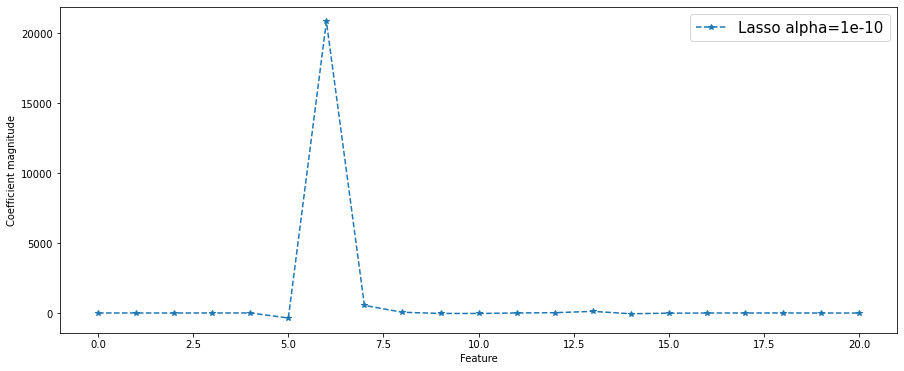

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25)
lasso = Lasso(alpha=optim_alpha, max_iter=20000).fit(X_train, y_train)

print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))


print("Weight of the top predictor = %f" %np.abs(np.amax(lasso.coef_.T)))
print("Top Predictor is Column %s" %np.abs(np.argmax(lasso.coef_.T)))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))

fig = plt.figure(figsize=(15, 6))

plt.plot(lasso.coef_.T, '--*', label=f"Lasso alpha={optim_alpha}")
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

(-1.0, 21.0)

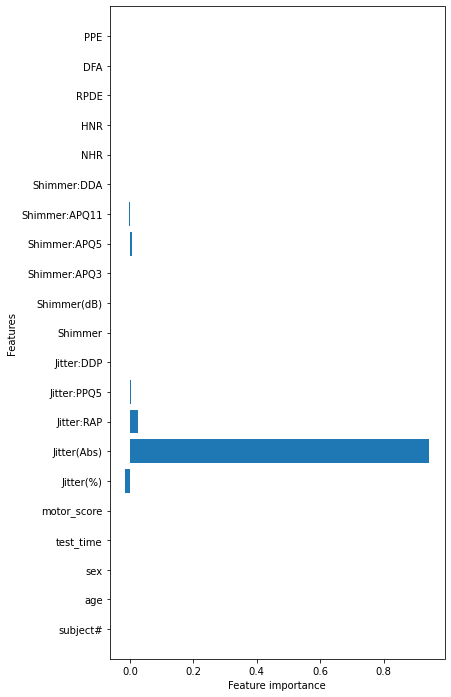

In [13]:
weights_normalized= lasso.coef_.T/np.sum(np.abs(lasso.coef_.T))


fig = plt.figure(figsize=(6, 12))
n_features = len(df_X.columns)
plt.barh(range(n_features), weights_normalized.flatten(), align='center')
plt.yticks(range(n_features), df_X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1,n_features)